In [1]:
import os
import matplotlib.pyplot as plt
import cv2
import random

# Define dataset paths
base_path = r"C:\Users\almansur\Documents\brain_tumor"
train_path = os.path.join(base_path, "Training")
test_path = os.path.join(base_path, "Testing")

# Verify paths
print(f"Training Path: {train_path}")
print(f"Testing Path: {test_path}")


Training Path: C:\Users\almansur\Documents\brain_tumor\Training
Testing Path: C:\Users\almansur\Documents\brain_tumor\Testing


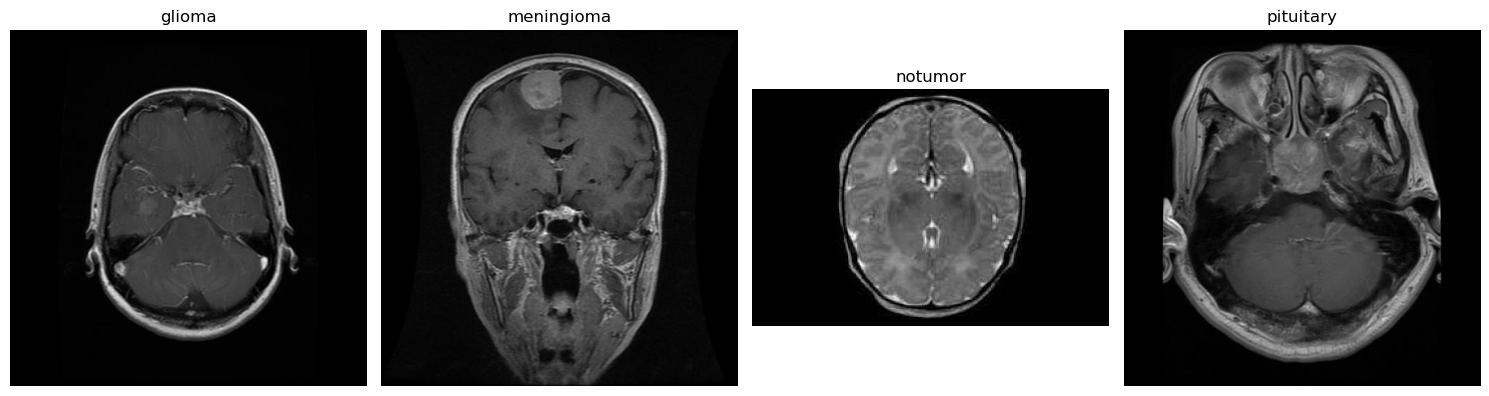

In [2]:
# Visualize random images from each class in the Testing folder
classes = ['glioma', 'meningioma', 'notumor', 'pituitary']
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
for i, cls in enumerate(classes):
    class_path = os.path.join(test_path, cls)
    image_name = random.choice(os.listdir(class_path))
    image_path = os.path.join(class_path, image_name)
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    axes[i].imshow(image, cmap='gray')
    axes[i].set_title(cls)
    axes[i].axis('off')
plt.tight_layout()
plt.show()


In [3]:
import numpy as np

def load_data(data_path, target_size=(128, 128)):
    images, labels = [], []
    class_names = os.listdir(data_path)
    class_map = {name: idx for idx, name in enumerate(class_names)}
    for cls in class_names:
        class_path = os.path.join(data_path, cls)
        for file in os.listdir(class_path):
            file_path = os.path.join(class_path, file)
            image = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
            image = cv2.resize(image, target_size)
            images.append(image)
            labels.append(class_map[cls])
    return np.array(images), np.array(labels), class_map

# Load Testing Data
X_test, y_test, class_map = load_data(test_path)

# Normalize
X_test = X_test / 255.0

print(f"Testing data shape: {X_test.shape}")
print(f"Class mapping: {class_map}")


Testing data shape: (1311, 128, 128)
Class mapping: {'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


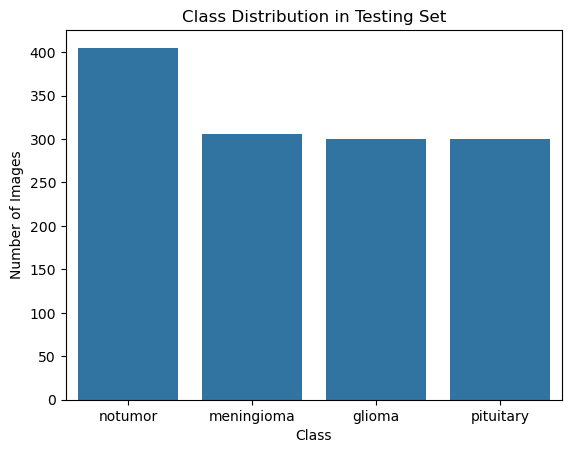

In [4]:
import pandas as pd
import seaborn as sns

# Count occurrences of each class
test_class_counts = pd.Series(y_test).value_counts()

# Plot distribution
sns.barplot(x=[list(class_map.keys())[idx] for idx in test_class_counts.index], y=test_class_counts.values)
plt.title('Class Distribution in Testing Set')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()
